In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/sample_data/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


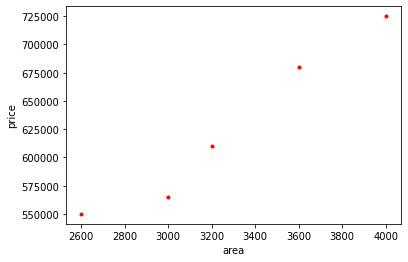

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='.')

In [ ]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
reg.predict([[3500]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655873.28767123])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
3500*135.78767+180616.4383

655873.2833

In [ ]:
area_df=pd.read_csv('/content/sample_data/areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p= reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_excel("prediction.xlsx")

In [ ]:
price_df=pd.read_csv('/content/sample_data/home_prices.csv')
price_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
price_df.bedrooms.median()

4.0

In [ ]:
price_df.bedrooms=price_df.bedrooms.fillna(price_df.bedrooms.median())
price_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
price_df.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(price_df.drop('price',axis='columns'),price_df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
t_df=pd.read_csv('/content/sample_data/titanic.csv')
t_df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
t_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
t_df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
inputs=t_df.drop('Survived',axis='columns')
target=t_df.Survived

In [ ]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [ ]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3) #test probability


In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test) #accuracy

0.7723880597014925

In [ ]:
X_test[0:10]

,Pclass,Age,Fare,female
326,3,61.000000,6.2375,0
230,1,35.000000,83.4750,1
735,3,28.500000,16.1000,0
210,3,24.000000,7.0500,0
108,3,38.000000,7.8958,0
731,3,11.000000,18.7875,0
402,3,21.000000,9.8250,1
567,3,29.000000,21.0750,1
868,3,29.699118,9.5000,0
363,3,35.000000,7.0500,0


In [ ]:
y_test[0:10]

326    0
230    1
735    0
210    0
108    0
731    0
402    0
567    0
868    0
363    0
Name: Survived, dtype: int64

In [ ]:
model.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
model.predict_proba(X_test[:10])

array([[0.95489844, 0.04510156],
       [0.01278722, 0.98721278],
       [0.96679033, 0.03320967],
       [0.96266618, 0.03733382],
       [0.96905637, 0.03094363],
       [0.94318925, 0.05681075],
       [0.3444871 , 0.6555129 ],
       [0.38641068, 0.61358932],
       [0.96704291, 0.03295709],
       [0.96847899, 0.03152101]])

In [ ]:
from sklearn.model_selection import cross_val_score # GridsearchCV(MODEL SELECTION AND Hyper paramete tuning)
cross_val_score(GaussianNB(),X_train,y_train,cv=5)

array([0.792     , 0.808     , 0.808     , 0.76612903, 0.71774194])